In [ ]:
#melakukan web scraping pada halaman berita yang berasal dari URL
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3799398/mukti-ali-dituntut-6-tahun-penjara"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



				Jakarta (ANTARA) - Jaksa penuntut umum (JPU) pada Kejaksaan Agung (Kejagung) RI menuntut Account Director of Integrated Account Departement PT Huawei Tech Investment Mukti Ali selama 6 tahun dan membayar denda Rp500 juta subsider 6 bulan pidana kurungan dalam perkara korupsi BTS 4G Kementerian Komunikasi dan Informatika (Kemenkominfo).
"Menjatuhkan pidana terhadap terdakwa Mukti Ali selama 6 tahun dikurangi sepenuhnya dengan lamanya terdakwa ditahan dengan perintah agar terdakwa tetap dilakukan penahanan di rutan," kata jaksa dalam persidangan di Pengadilan Tindak Pidana Korupsi (Tipikor) pada Pengadilan Negeri Jakarta Pusat, Senin.
Jaksa menyatakan bahwa terdakwa Mukti Ali terbukti secara sah dan meyakinkan bersalah menurut hukum turut serta dalam melakukan tindak pidana korupsi BTS 4G Kementerian Komunikasi dan Informatika (Kemenkominfo).
Mukti didakwa telah melanggar Pasal 2 ayat (1) juncto Pasal 18 Undang-Undang Nomor 31 Tahun 1999 tentang Pemberantasan Tindak Pidana Korupsi s

In [ ]:
#menghitung dan mencetak nilai TF-IDF (Term Frequency-Inverse Document Frequency)
#untuk setiap kata dalam setiap kalimat dari teks yang telah di-tokenisasi sebelumnya.
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
				Jakarta (ANTARA) - Jaksa penuntut umum (JPU) pada Kejaksaan Agung (Kejagung) RI menuntut Account Director of Integrated Account Departement PT Huawei Tech Investment Mukti Ali selama 6 tahun dan membayar denda Rp500 juta subsider 6 bulan pidana kurungan dalam perkara korupsi BTS 4G Kementerian Komunikasi dan Informatika (Kemenkominfo).
4g: 0.1156
account: 0.3291
agung: 0.1645
ali: 0.1156
antara: 0.1429
bts: 0.1156
bulan: 0.1645
dalam: 0.1058
dan: 0.1684
denda: 0.1645
departement: 0.1645
director: 0.1645
huawei: 0.1429
informatika: 0.1429
integrated: 0.1645
investment: 0.1645
jakarta: 0.1429
jaksa: 0.1156
jpu: 0.1645
juta: 0.1429
kejagung: 0.1645
kejaksaan: 0.1645
kemenkominfo: 0.1275
kementerian: 0.1429
komunikasi: 0.1429
korupsi: 0.0842
kurungan: 0.1645
membayar: 0.1645
menuntut: 0.1645
mukti: 0.1058
of: 0.1645
pada: 0.1156
penuntut: 0.1645
perkara: 0.1645
pidana: 0.0905
pt: 0.1275
ri: 0.1645
rp500: 0.1429
selama: 0.1156
subsider: 0.1645
tahun: 0.0905
tech: 0.1645
umum

In [ ]:
#menghitung kemiripan kosinus (cosine similarity) antara dua kalimat berdasarkan vektor representasi TF-IDF dari masing-masing kalimat.
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")



Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1292


In [ ]:
#menghitung dan mencetak kemiripan kosinus (cosine similarity) antara semua pasangan kalimat dalam teks yang telah di-tokenisasi

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1292
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.2711
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0433
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0274
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0422
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0189
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0950
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1081
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0729
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.1471
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0216
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.1277
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0640
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.1506
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.1018
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0277
Cosine Similarity antara 

In [ ]:
#membuat dan mencetak DataFrame menggunakan hasil perhitungan cosine similarity antara semua pasangan kalimat dalam teks yang telah di-tokenisasi dan matriks TF-IDF
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15
Kalimat 1,1.000000,0.129207,0.271076,0.043256,0.027373,0.000000,0.042166,0.018898,0.094991,0.108141,0.072895,0.147054,0.021622,0.127719,0.064034
Kalimat 2,0.129207,1.000000,0.150629,0.101831,0.027653,0.000000,0.056223,0.127453,0.167452,0.069650,0.089537,0.110944,0.010599,0.000000,0.000000
Kalimat 3,0.271076,0.150629,1.000000,0.064716,0.000000,0.000000,0.072666,0.057879,0.142434,0.103891,0.021658,0.236561,0.037383,0.049808,0.000000
Kalimat 4,0.043256,0.101831,0.064716,1.000000,0.034163,0.218788,0.011488,0.059628,0.066306,0.036865,0.058920,0.058823,0.000000,0.000000,0.000000
Kalimat 5,0.027373,0.027653,0.000000,0.034163,1.000000,0.000000,0.000000,0.000000,0.000000,0.043924,0.105255,0.037224,0.000000,0.000000,0.000000
Kalimat 6,0.000000,0.000000,0.000000,0.218788,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 7,0.042166,0.056223,0.072666,0.011488,0.000000,0.000000,1.000000,0.067593,0.369886,0.034976,0.050985,0.052010,0.023815,0.023506,0.000000
Kalimat 8,0.018898,0.127453,0.057879,0.059628,0.000000,0.000000,0.067593,1.000000,0.032653,0.033741,0.000000,0.031490,0.022679,0.000000,0.000000
Kalimat 9,0.094991,0.167452,0.142434,0.066306,0.000000,0.000000,0.369886,0.032653,1.000000,0.025293,0.058409,0.093636,0.025852,0.025516,0.000000
Kalimat 10,0.108141,0.069650,0.103891,0.036865,0.043924,0.000000,0.034976,0.033741,0.025293,1.000000,0.497215,0.108290,0.037817,0.157833,0.000000


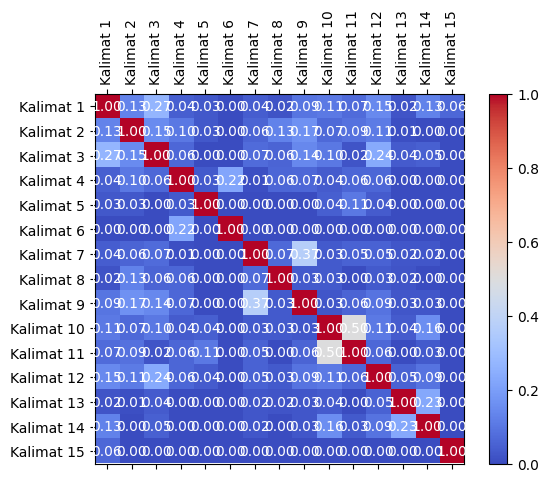

In [ ]:
#membuat dan menampilkan grafik matriks yang menggambarkan cosine similarity antara semua pasangan kalimat dalam teks yang telah di-tokenisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [ ]:
#membangun sebuah graf yang merepresentasikan hubungan antara kalimat dalam teks berdasarkan kemiripan (similarity) antara kalimat-kalimat tersebut.
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 
				Jakarta (ANTARA) - Jaksa penuntut umum (JPU) pada Kejaksaan Agung (Kejagung) RI menuntut Account Director of Integrated Account Departement PT Huawei Tech Investment Mukti Ali selama 6 tahun dan membayar denda Rp500 juta subsider 6 bulan pidana kurungan dalam perkara korupsi BTS 4G Kementerian Komunikasi dan Informatika (Kemenkominfo).: 16.2850
Closeness Centrality of "Menjatuhkan pidana terhadap terdakwa Mukti Ali selama 6 tahun dikurangi sepenuhnya dengan lamanya terdakwa ditahan dengan perintah agar terdakwa tetap dilakukan penahanan di rutan," kata jaksa dalam persidangan di Pengadilan Tindak Pidana Korupsi (Tipikor) pada Pengadilan Negeri Jakarta Pusat, Senin.: 16.1433
Closeness Centrality of Jaksa menyatakan bahwa terdakwa Mukti Ali terbukti secara sah dan meyakinkan bersalah menurut hukum turut serta dalam melakukan tindak pidana korupsi BTS 4G Kementerian Komunikasi dan Informatika (Kemenkominfo).: 12.6570
Closeness Centrality of Mukti didakwa telah

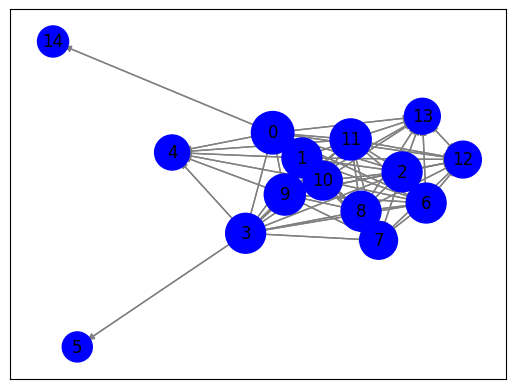

Closeness Centrality (Dari Tertinggi ke Terendah):
Node 0: Closeness Centrality 0.9333
Kalimat: 
				Jakarta (ANTARA) - Jaksa penuntut umum (JPU) pada Kejaksaan Agung (Kejagung) RI menuntut Account Director of Integrated Account Departement PT Huawei Tech Investment Mukti Ali selama 6 tahun dan membayar denda Rp500 juta subsider 6 bulan pidana kurungan dalam perkara korupsi BTS 4G Kementerian Komunikasi dan Informatika (Kemenkominfo).

Node 9: Closeness Centrality 0.8750
Kalimat: Baca juga: Irwan Hermawan dituntut 6 tahun penjara terkait korupsi BTS 4G
Baca juga: Galumbang Menak dituntut 15 tahun penjara dalam kasus BTS 4G
 
Sidang tuntutan ini digelar bersamaan dengan tuntutan dua terdakwa lainnya, yakni Komisaris PT Solitech Media Sinergy Irwan Hermawan dan eks Direktur Utama PT Mora Telematika Indonesia Galumbang Menak Simanjuntak.

Node 11: Closeness Centrality 0.8750
Kalimat: Para terdakwa diduga melakukan tindak pidana korupsi penyediaan infrastruktur base transceiver station (BT

In [ ]:
#membuat grafik berarah (Directed Graph - DiGraph) yang merepresentasikan hubungan antara kalimat-kalimat dalam teks berdasarkan kemiripan (cosine similarity)
import networkx as nx
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality dari yang tertinggi hingga terendah
print("Closeness Centrality (Dari Tertinggi ke Terendah):")
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

for node, closeness in sorted_closeness:
    sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
    print(f"Node {node}: Closeness Centrality {closeness:.4f}")
    print(f"Kalimat: {sentence}")
    print()





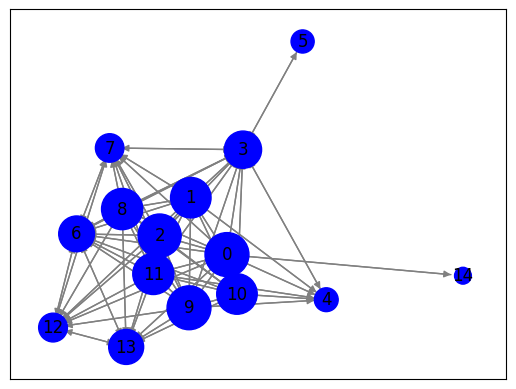

PageRank Centrality (Dari Tertinggi ke Terendah):
Node 0: PageRank Centrality 0.1001
Kalimat: 
				Jakarta (ANTARA) - Jaksa penuntut umum (JPU) pada Kejaksaan Agung (Kejagung) RI menuntut Account Director of Integrated Account Departement PT Huawei Tech Investment Mukti Ali selama 6 tahun dan membayar denda Rp500 juta subsider 6 bulan pidana kurungan dalam perkara korupsi BTS 4G Kementerian Komunikasi dan Informatika (Kemenkominfo).

Node 9: PageRank Centrality 0.0997
Kalimat: Baca juga: Irwan Hermawan dituntut 6 tahun penjara terkait korupsi BTS 4G
Baca juga: Galumbang Menak dituntut 15 tahun penjara dalam kasus BTS 4G
 
Sidang tuntutan ini digelar bersamaan dengan tuntutan dua terdakwa lainnya, yakni Komisaris PT Solitech Media Sinergy Irwan Hermawan dan eks Direktur Utama PT Mora Telematika Indonesia Galumbang Menak Simanjuntak.

Node 2: PageRank Centrality 0.0961
Kalimat: Jaksa menyatakan bahwa terdakwa Mukti Ali terbukti secara sah dan meyakinkan bersalah menurut hukum turut serta

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j, weight=similarity)  # Gunakan similarity sebagai weight

# Hitung PageRank centrality
pagerank_centrality = nx.pagerank(G, weight='weight')

# Visualisasi PageRank centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 10000 for v in pagerank_centrality.values()]  # Ubah ukuran node berdasarkan PageRank, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak PageRank centrality dari yang tertinggi hingga terendah
print("PageRank Centrality (Dari Tertinggi ke Terendah):")
sorted_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)

for node, pagerank in sorted_pagerank:
    sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
    print(f"Node {node}: PageRank Centrality {pagerank:.4f}")
    print(f"Kalimat: {sentence}")
    print()
